In [2]:
#%%
import matplotlib.pyplot as plt
import sys
import numpy as np



In [3]:
sys.path.insert(1, r"C:\Users\Benja\Code\Python\Finanzen\Haushaltsbuch\src")

from data_structure import *


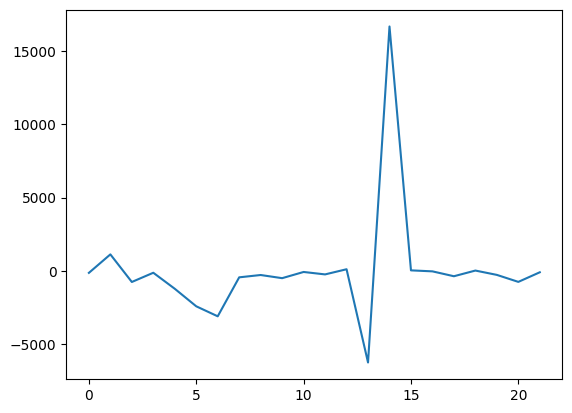

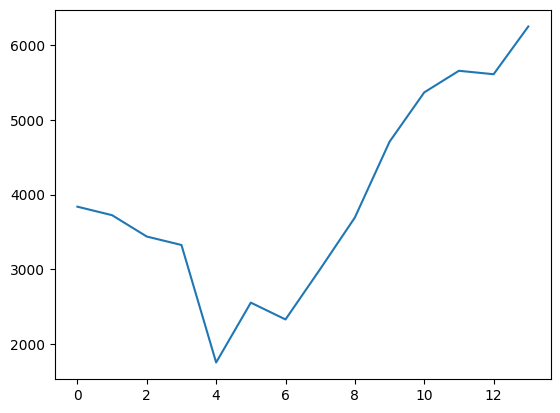

In [8]:
# %%
Categories = Category.Categories
SpecificMonths = SpecificMonth.SpecificMonths.members
y = []
for member in Categories.members:
    y_temp = 0
    for trns in member.members:
        y_temp += trns.value
    y.append(y_temp)

fig, ax = plt.subplots()
# x = np.linspace(0, len(Categories.members), )
ax.plot( y)





Betrachtung der monatlichen Start und Endwerte

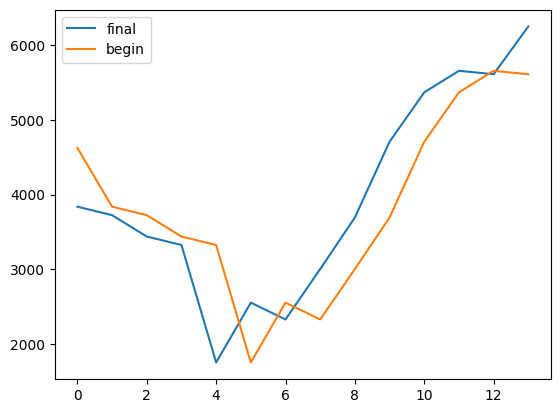

In [9]:
fig2, ax2 = plt.subplots()
monthly_money_final = [member.final_balance for member in SpecificMonths]
monthly_money_begin = [member.start_balance for member in SpecificMonths]
ax2.plot(monthly_money_final, label="final")
ax2.plot(monthly_money_begin, label="begin")
ax2.legend()


==> Wie erwartet ist balance begin und final nur verschoben, aber sonst gleich.

Im nächsten Schritt will ich einen Fit ab Mai 2022 machen, um zu sehen, wie sich mein Kontostand, als linear genähert, geändert hat, seit dem ich arbeite. ( Ob das sinn macht ist fraglich.)

In [7]:
# %% linearer fit 
# #x2 = np.linspace(0, len(SpecificMonth.SpecificMonths.members)+1, 1)
# for member in SpecificMonth.SpecificMonths.members:
#     print(member)
#result = np.polyfit(x2, monthly_money, 1)
print(len(SpecificMonth.SpecificMonths.members))
print(len(monthly_money))
print(np.linspace(0, SpecificMonth.Specific))


14
14


test, if everything works as expected